Business Problem: Fond Rouge, a French shoe company whose US sales are being impacted by counterfeit products.

Using Analysis and Visuatization I have to help Fond Rouge to make informative decisions.

Steps that I followed:
  

*   Loading the data, pre - processed the data by joining and data wrangling. That would make analaysis easy.

*   Calculate Revenue and refund using formulas for each orderID
*   Based on globally and US figure out avg sentiment and how revenue and refund has affected the counterfiet issues.










In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [78]:
import numpy as np

In [106]:
import plotly.graph_objects as go

**Loading the data from xlsx files**

In [8]:
sales_data = pd.read_excel("/content/fond-rouge_data.xlsx", sheet_name='Sales')
returns_data = pd.read_excel("/content/fond-rouge_data.xlsx", sheet_name='Returns')
sentiment_data = pd.read_excel("/content/fond-rouge_data.xlsx", sheet_name='Sentiment')

In [9]:
print(sales_data.head())
print(returns_data.head())
print(sentiment_data.head())

                                      OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a   2019/2/8  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e  2019/3/10  Belgium  Brussels   
2  order-fd686823-060b-4d59-bd0a-512f87eb6654  2019/4/10  Belgium  Brussels   
3  order-6e3e2947-bf9c-4993-9215-307d1a61cf92  2019/5/24  Belgium  Brussels   
4  order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2  2019/6/22  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   
2  50.850346    4.351721               Flats   
3  50.850346    4.351721           Platforms   
4  50.850346    4.351721           Stilettos   

                                      ProductID   Product  Quantity  Discount  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d  François         7      3.96   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e     Denis         9      1

In [27]:
print(returns_data.describe)

<bound method NDFrame.describe of                                         OrderID    Status
0    order-8cacb48a-6a1e-42de-abe2-cf6092a48af2  RETURNED
1    order-f696bafe-acd9-4985-a4ad-05da86cc8268  RETURNED
2    order-3c18c650-b023-4b3e-bc03-e6ae455329ff  RETURNED
3    order-6b940800-f65e-4717-ac18-bd12e0e91400  RETURNED
4    order-766719c3-2fe4-4fc9-8d44-26c10a575ea2  RETURNED
..                                          ...       ...
833  order-c58b5b3c-8cb7-4022-98a3-bfa07961200a  RETURNED
834  order-4329c017-0b29-4d41-aa78-3d98665d6388  RETURNED
835  order-230b6972-ea13-4e9e-8b33-25deb575e141  RETURNED
836  order-f2b16c1b-2e32-47cc-862b-3ccb2c15706d  RETURNED
837  order-28b5adf0-66e1-40ca-b7b6-e863eca99864  RETURNED

[838 rows x 2 columns]>


**Check Any Null values**

---



In [10]:
print(sales_data.isnull().sum())
print(returns_data.isnull().sum())
print(sentiment_data.isnull().sum())

OrderID                0
Date                   0
Country                0
City                   0
Latitude               0
Longtitude             0
ProductCategoryName    0
ProductID              0
Product                0
Quantity               0
Discount               0
Price                  0
Status                 0
dtype: int64
OrderID    0
Status     0
dtype: int64
Year_Month     0
Location_ID    0
ProductID      0
Product        0
Sentiment      0
Class          0
dtype: int64


In [ ]:
sales_data.groupby('Status').count()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product,Quantity,Discount,Price
Status,,,,,,,,,,,,
COMPLETED,9450,9450,9450,9450,9450,9450,9450,9450,9450,9450,9450,9450


**Performaing EDA on the Data**

---



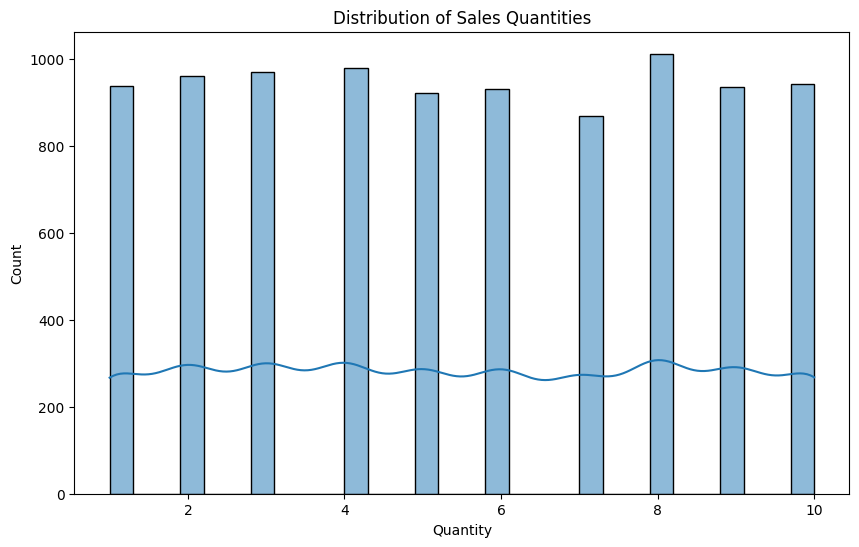

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Quantity'], bins=30, kde=True)
plt.title('Distribution of Sales Quantities')
plt.show()

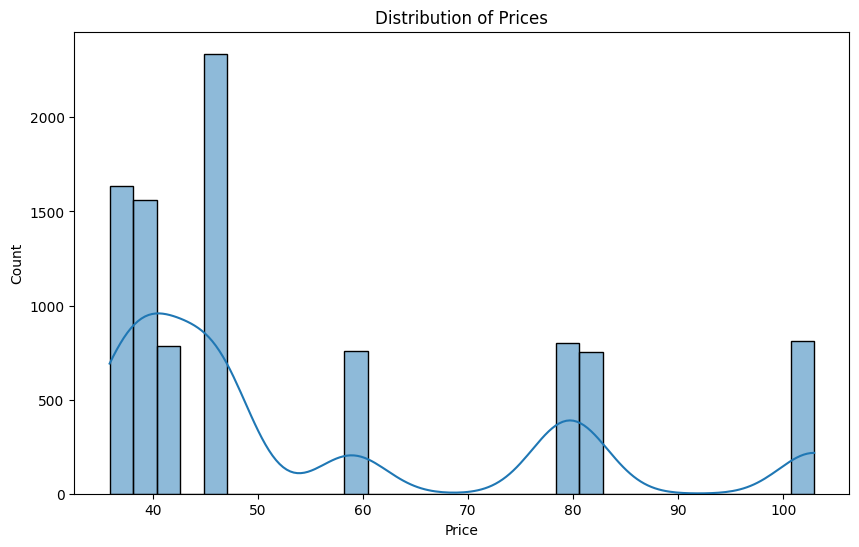

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

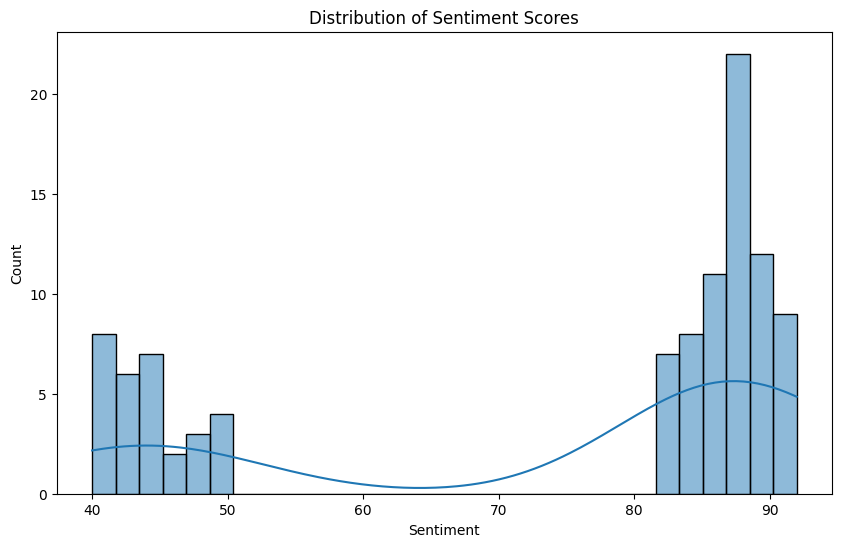

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_data['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In [11]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [12]:
sales_data['Year_Month'] = sales_data['Date'].dt.strftime('%Y/%m')

In [13]:
sales_data['Location_ID'] = sales_data['Country'] + ', ' + sales_data['City']

In [14]:
sales_data.head()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product,Quantity,Discount,Price,Status,Year_Month,Location_ID
0,order-9dd87a4c-7374-446a-845b-37fa211c121a,2019-02-08,Belgium,Brussels,50.850346,4.351721,Brogues,product-124ef52a-c7c3-48af-b315-33a14b2f6e1d,François,7,3.96,41.45,COMPLETED,2019/02,"Belgium, Brussels"
1,order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e,2019-03-10,Belgium,Brussels,50.850346,4.351721,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,9,1.42,58.95,COMPLETED,2019/03,"Belgium, Brussels"
2,order-fd686823-060b-4d59-bd0a-512f87eb6654,2019-04-10,Belgium,Brussels,50.850346,4.351721,Flats,product-0a97c64c-582b-41a9-b367-2a4e081cf3d5,Estelle,5,2.14,45.61,COMPLETED,2019/04,"Belgium, Brussels"
3,order-6e3e2947-bf9c-4993-9215-307d1a61cf92,2019-05-24,Belgium,Brussels,50.850346,4.351721,Platforms,product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6,Bella,8,4.55,46.93,COMPLETED,2019/05,"Belgium, Brussels"
4,order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2,2019-06-22,Belgium,Brussels,50.850346,4.351721,Stilettos,product-fa4a41fc-4a31-44b5-953f-8e2a45b43673,Cecile,4,3.92,78.56,COMPLETED,2019/06,"Belgium, Brussels"


Merging Sales and Returns Data:

---



In [46]:
merged_data = pd.merge(sales_data, returns_data, on='OrderID', how='left', suffixes=('', '_Return'))

In [57]:
merged_data["Status"],merged_data['Status_Return']

(0       COMPLETED
 1       COMPLETED
 2       COMPLETED
 3       COMPLETED
 4       COMPLETED
           ...    
 9445    COMPLETED
 9446    COMPLETED
 9447    COMPLETED
 9448    COMPLETED
 9449    COMPLETED
 Name: Status, Length: 9450, dtype: object,
 0            NaN
 1            NaN
 2            NaN
 3            NaN
 4            NaN
           ...   
 9445    RETURNED
 9446    RETURNED
 9447    RETURNED
 9448    RETURNED
 9449    RETURNED
 Name: Status_Return, Length: 9450, dtype: object)

In [33]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   OrderID              838 non-null    object        
 1   Date                 838 non-null    datetime64[ns]
 2   Country              838 non-null    object        
 3   City                 838 non-null    object        
 4   Latitude             838 non-null    float64       
 5   Longtitude           838 non-null    float64       
 6   ProductCategoryName  838 non-null    object        
 7   ProductID            838 non-null    object        
 8   Product              838 non-null    object        
 9   Quantity             838 non-null    int64         
 10  Discount             838 non-null    float64       
 11  Price                838 non-null    float64       
 12  Status               838 non-null    object        
 13  Year_Month           838 non-null  

In [30]:
merged_data.head()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product,Quantity,Discount,Price,Status,Year_Month,Location_ID,Status_Return
0,order-064459d9-d81d-4410-9320-8097de3804e1,2019-09-15,Belgium,Brussels,50.850346,4.351721,Flats,product-f709c12a-ffe5-48b1-a3d2-f247acf8e176,Danielle,7,0.18,36.46,COMPLETED,2019/09,"Belgium, Brussels",RETURNED
1,order-5d4f7bd9-b6c8-42e6-b345-31da3db5bdc5,2020-01-01,Belgium,Brussels,50.850346,4.351721,Stilettos,product-7bef3e02-033c-4259-93da-a25f4f7169be,Claudette,6,0.60,102.95,COMPLETED,2020/01,"Belgium, Brussels",RETURNED
2,order-e31cc2fa-31c1-4cd8-a78b-53e9a5da78b2,2020-05-15,Belgium,Brussels,50.850346,4.351721,Platforms,product-b7c06d0a-977d-497b-ae3e-95b58985cafd,Amélie,6,3.06,40.00,COMPLETED,2020/05,"Belgium, Brussels",RETURNED
3,order-33677257-805a-4b99-b41d-a32517d2ac26,2020-05-25,Belgium,Brussels,50.850346,4.351721,Stilettos,product-7bef3e02-033c-4259-93da-a25f4f7169be,Claudette,6,2.41,102.95,COMPLETED,2020/05,"Belgium, Brussels",RETURNED
4,order-3c18c650-b023-4b3e-bc03-e6ae455329ff,2020-07-05,Belgium,Brussels,50.850346,4.351721,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,10,5.41,58.95,COMPLETED,2020/07,"Belgium, Brussels",RETURNED


Merging with Sentiment **Data**

---



In [58]:
final_data = pd.merge(merged_data, sentiment_data, on=['Location_ID','Year_Month', 'ProductID'],how ='left')

In [59]:
final_data.head()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Product_x,Quantity,Discount,Price,Status,Year_Month,Location_ID,Status_Return,Product_y,Sentiment,Class
0,order-9dd87a4c-7374-446a-845b-37fa211c121a,2019-02-08,Belgium,Brussels,50.850346,4.351721,Brogues,product-124ef52a-c7c3-48af-b315-33a14b2f6e1d,François,7,3.96,41.45,COMPLETED,2019/02,"Belgium, Brussels",NaN,NaN,NaN,NaN
1,order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e,2019-03-10,Belgium,Brussels,50.850346,4.351721,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,Denis,9,1.42,58.95,COMPLETED,2019/03,"Belgium, Brussels",NaN,NaN,NaN,NaN
2,order-fd686823-060b-4d59-bd0a-512f87eb6654,2019-04-10,Belgium,Brussels,50.850346,4.351721,Flats,product-0a97c64c-582b-41a9-b367-2a4e081cf3d5,Estelle,5,2.14,45.61,COMPLETED,2019/04,"Belgium, Brussels",NaN,NaN,NaN,NaN
3,order-6e3e2947-bf9c-4993-9215-307d1a61cf92,2019-05-24,Belgium,Brussels,50.850346,4.351721,Platforms,product-642f72ba-c5d6-4126-be0f-a22fe4e9fbb6,Bella,8,4.55,46.93,COMPLETED,2019/05,"Belgium, Brussels",NaN,NaN,NaN,NaN
4,order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2,2019-06-22,Belgium,Brussels,50.850346,4.351721,Stilettos,product-fa4a41fc-4a31-44b5-953f-8e2a45b43673,Cecile,4,3.92,78.56,COMPLETED,2019/06,"Belgium, Brussels",NaN,NaN,NaN,NaN


In [63]:
final_data['Status'] = final_data.apply(
    lambda row: 'RETURNED' if row['Status_Return'] == 'RETURNED' else row['Status'], axis=1
)

In [66]:
final_data.drop(columns=['Status_Return'], inplace=True)

In [67]:
print(final_data.isnull().sum())

OrderID                   0
Date                      0
Country                   0
City                      0
Latitude                  0
Longtitude                0
ProductCategoryName       0
ProductID                 0
Product_x                 0
Quantity                  0
Discount                  0
Price                     0
Status                    0
Year_Month                0
Location_ID               0
Product_y              6329
Sentiment              6329
Class                  6329
dtype: int64


In [40]:
inconsistencies = final_data[final_data['Product_x'] != final_data['Product_y']]
print(f"Inconsistencies found:\n{inconsistencies[['Product_x', 'Product_y']]}")

Inconsistencies found:
Empty DataFrame
Columns: [Product_x, Product_y]
Index: []


In [68]:
final_data['Product'] = final_data['Product_x']

# Drop the unnecessary columns
final_data.drop(columns=['Product_x', 'Product_y'], inplace=True)

# Verify the final data
print(final_data.head())
print(final_data.isnull().sum())

                                      OrderID       Date  Country      City  \
0  order-9dd87a4c-7374-446a-845b-37fa211c121a 2019-02-08  Belgium  Brussels   
1  order-47acd540-c1dd-47a8-a5dc-39cee5c43a5e 2019-03-10  Belgium  Brussels   
2  order-fd686823-060b-4d59-bd0a-512f87eb6654 2019-04-10  Belgium  Brussels   
3  order-6e3e2947-bf9c-4993-9215-307d1a61cf92 2019-05-24  Belgium  Brussels   
4  order-28117cd2-a47e-42ef-a619-fe52ec2cd7b2 2019-06-22  Belgium  Brussels   

    Latitude  Longtitude ProductCategoryName  \
0  50.850346    4.351721             Brogues   
1  50.850346    4.351721             Brogues   
2  50.850346    4.351721               Flats   
3  50.850346    4.351721           Platforms   
4  50.850346    4.351721           Stilettos   

                                      ProductID  Quantity  Discount  Price  \
0  product-124ef52a-c7c3-48af-b315-33a14b2f6e1d         7      3.96  41.45   
1  product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e         9      1.42  58.95   
2 

In [72]:
final_data.dropna(subset=['Sentiment', 'Class'], inplace=True)
final_data.isnull().sum()

OrderID                0
Date                   0
Country                0
City                   0
Latitude               0
Longtitude             0
ProductCategoryName    0
ProductID              0
Quantity               0
Discount               0
Price                  0
Status                 0
Year_Month             0
Location_ID            0
Sentiment              0
Class                  0
Product                0
Revenue                0
dtype: int64

In [76]:
final_data['Revenue'] = final_data['Quantity'] * (final_data['Price'] - final_data['Discount'])

In [77]:
print(final_data.head())

                                       OrderID       Date  Country      City  \
14  order-d47b5713-c47a-4b9f-8efb-a72049ee68e3 2019-10-23  Belgium  Brussels   
15  order-507c6ac6-61a0-436c-b23e-a02501760160 2019-10-03  Belgium  Brussels   
16  order-6202751c-84c5-4a7c-971b-b4a93448544a 2019-10-09  Belgium  Brussels   
17  order-83793c24-d3ae-4591-8467-575e45e471a7 2019-10-06  Belgium  Brussels   
18  order-240e777e-f086-4516-86ed-8dc58dcba64e 2019-11-15  Belgium  Brussels   

     Latitude  Longtitude ProductCategoryName  \
14  50.850346    4.351721           Stilettos   
15  50.850346    4.351721           Platforms   
16  50.850346    4.351721             Brogues   
17  50.850346    4.351721               Flats   
18  50.850346    4.351721             Brogues   

                                       ProductID  Quantity  Discount  Price  \
14  product-f7e07591-2598-4615-82c2-34f6ad248e50         9      3.52  80.95   
15  product-98f22154-ee97-4ef8-be84-7283cec0ebad         4      1.

In [79]:
final_data['Refund'] = np.where(final_data['Status'] == 'RETURNED', final_data['Revenue'], 0)

In [80]:
final_data.head()

,OrderID,Date,Country,City,Latitude,Longtitude,ProductCategoryName,ProductID,Quantity,Discount,Price,Status,Year_Month,Location_ID,Sentiment,Class,Product,Revenue,Refund
14,order-d47b5713-c47a-4b9f-8efb-a72049ee68e3,2019-10-23,Belgium,Brussels,50.850346,4.351721,Stilettos,product-f7e07591-2598-4615-82c2-34f6ad248e50,9,3.52,80.95,COMPLETED,2019/10,"Belgium, Brussels",87.0,POS,Eloise,696.87,0.0
15,order-507c6ac6-61a0-436c-b23e-a02501760160,2019-10-03,Belgium,Brussels,50.850346,4.351721,Platforms,product-98f22154-ee97-4ef8-be84-7283cec0ebad,4,1.53,39.95,COMPLETED,2019/10,"Belgium, Brussels",85.0,POS,Bridgette,153.68,0.0
16,order-6202751c-84c5-4a7c-971b-b4a93448544a,2019-10-09,Belgium,Brussels,50.850346,4.351721,Brogues,product-124ef52a-c7c3-48af-b315-33a14b2f6e1d,1,0.48,41.45,COMPLETED,2019/10,"Belgium, Brussels",92.0,POS,François,40.97,0.0
17,order-83793c24-d3ae-4591-8467-575e45e471a7,2019-10-06,Belgium,Brussels,50.850346,4.351721,Flats,product-f709c12a-ffe5-48b1-a3d2-f247acf8e176,6,1.42,36.46,COMPLETED,2019/10,"Belgium, Brussels",85.0,POS,Danielle,210.24,0.0
18,order-240e777e-f086-4516-86ed-8dc58dcba64e,2019-11-15,Belgium,Brussels,50.850346,4.351721,Brogues,product-a19d1434-d5f2-4a2a-9fe0-7d70f63e391e,7,3.30,58.95,COMPLETED,2019/11,"Belgium, Brussels",87.0,POS,Denis,389.55,0.0


1. Column & Line: Revenue & Refund per Country

---



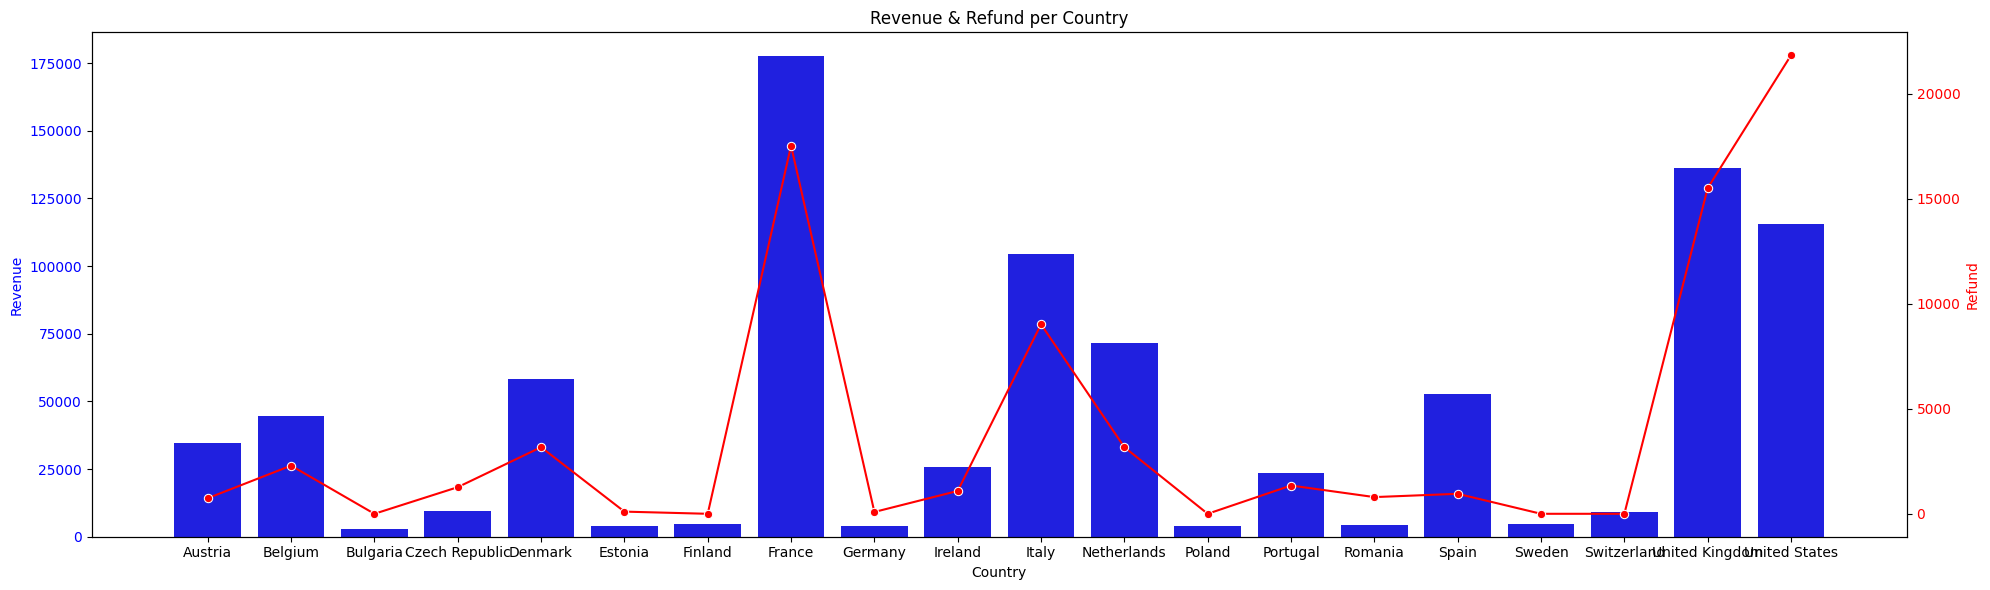

In [91]:
# Group by country
country_data = final_data.groupby('Country').agg({'Revenue': 'sum', 'Refund': 'sum'}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(x='Country', y='Revenue', data=country_data, ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x='Country', y='Refund', data=country_data, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Refund', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Revenue & Refund per Country')
plt.xticks(rotation=56)
plt.tight_layout()
plt.show()

Refund/Revenue per Country

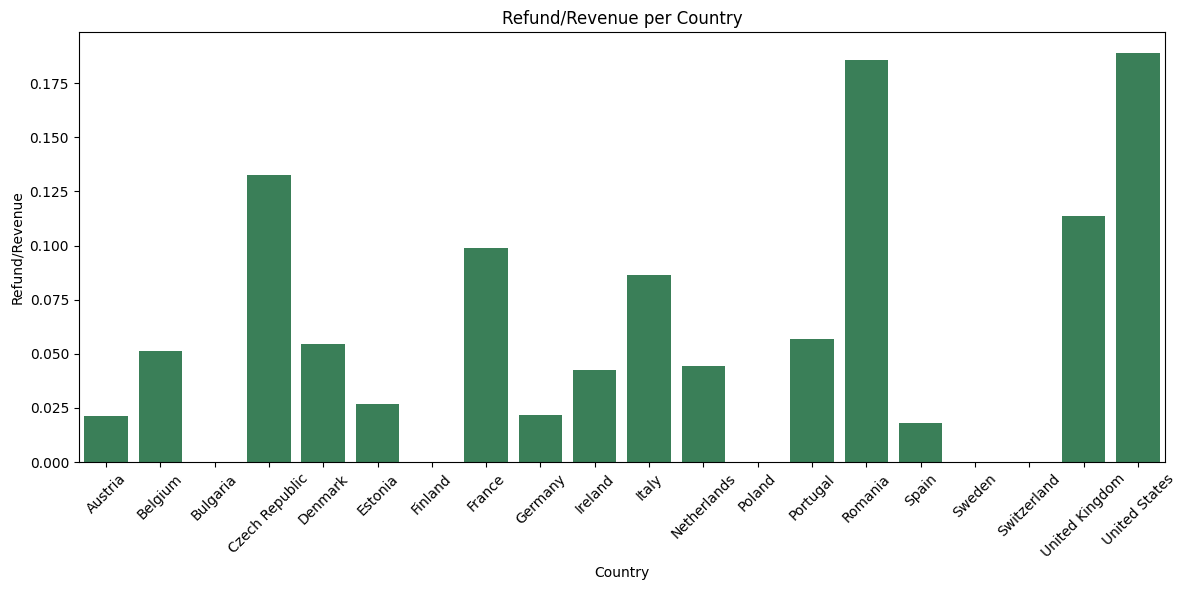

In [87]:
country_data['Refund/Revenue'] = country_data['Refund'] / country_data['Revenue']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Refund/Revenue', data=country_data, color='seagreen')
plt.title('Refund/Revenue per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

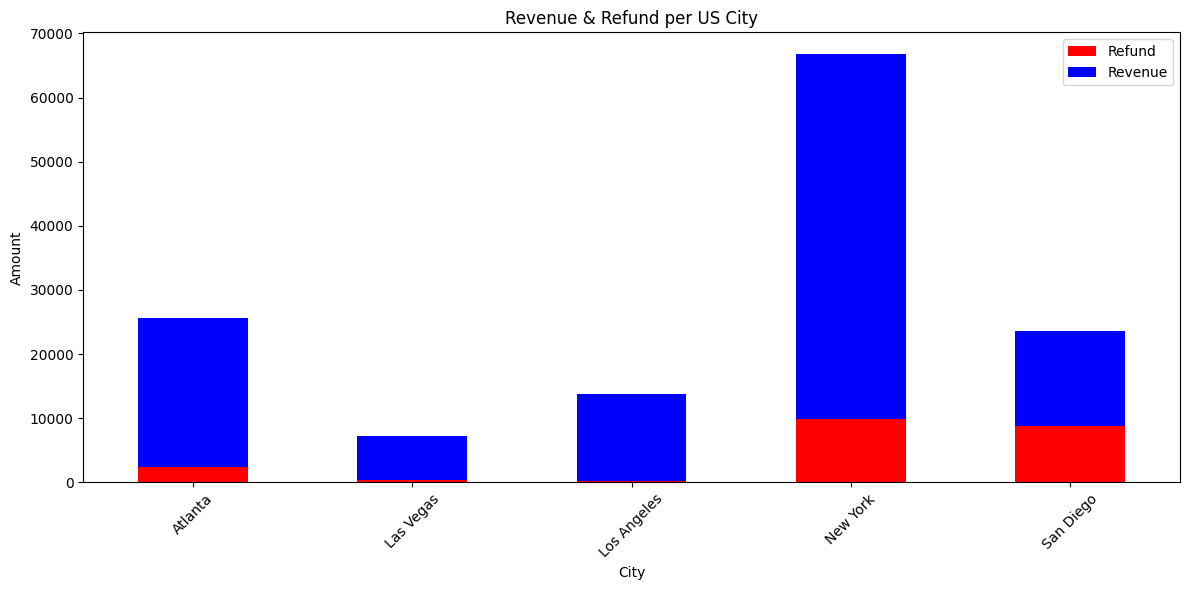

In [94]:
us_data = final_data[final_data['Country'] == 'United States'].groupby('City').agg({'Refund': 'sum', 'Revenue': 'sum'}).reset_index()

# Plot
us_data.plot(kind='bar', x='City', stacked=True, figsize=(12, 6), color=['red', 'blue'])
plt.title('Revenue & Refund per US City')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Refend/Revenue and AVvg Sentiment Per US City

---



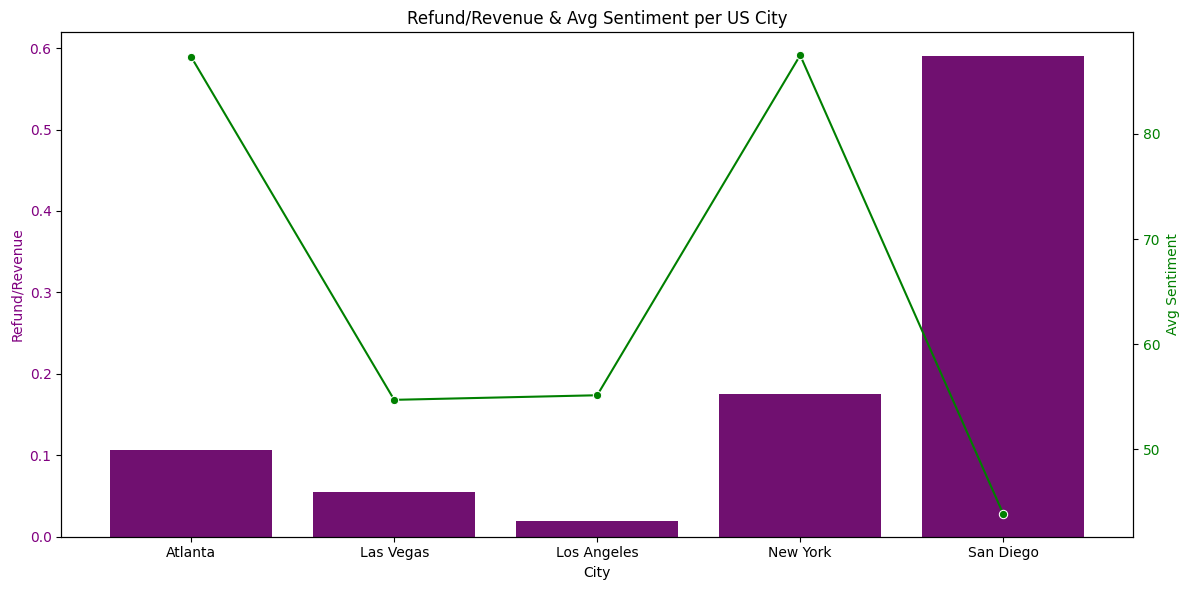

In [97]:
# Calculate Refund/Revenue and Avg Sentiment
us_data['Refund/Revenue'] = us_data['Refund'] / us_data['Revenue']
us_data['Avg_Sentiment'] = final_data[final_data['Country'] == 'United States'].groupby('City')['Sentiment'].mean().values

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='City', y='Refund/Revenue', data=us_data, ax=ax1, color='purple')
ax1.set_ylabel('Refund/Revenue', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
sns.lineplot(x='City', y='Avg_Sentiment', data=us_data, ax=ax2, color='green', marker='o')
ax2.set_ylabel('Avg Sentiment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Refund/Revenue & Avg Sentiment per US City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


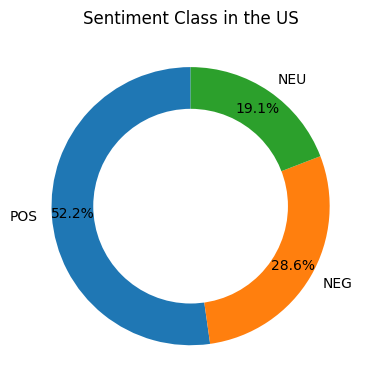

In [100]:
us_sentiment_class = final_data[final_data['Country'] == 'United States']['Class'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(us_sentiment_class, labels=us_sentiment_class.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Class in the US')
plt.tight_layout()
plt.show()

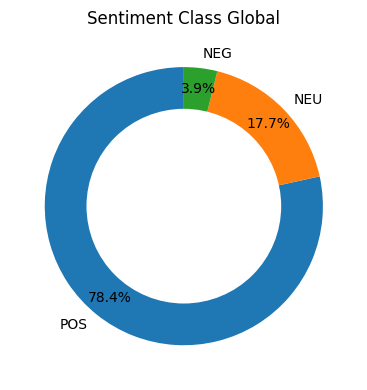

In [102]:
global_sentiment_class = final_data['Class'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(global_sentiment_class, labels=global_sentiment_class.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Class Global')
plt.tight_layout()
plt.show()

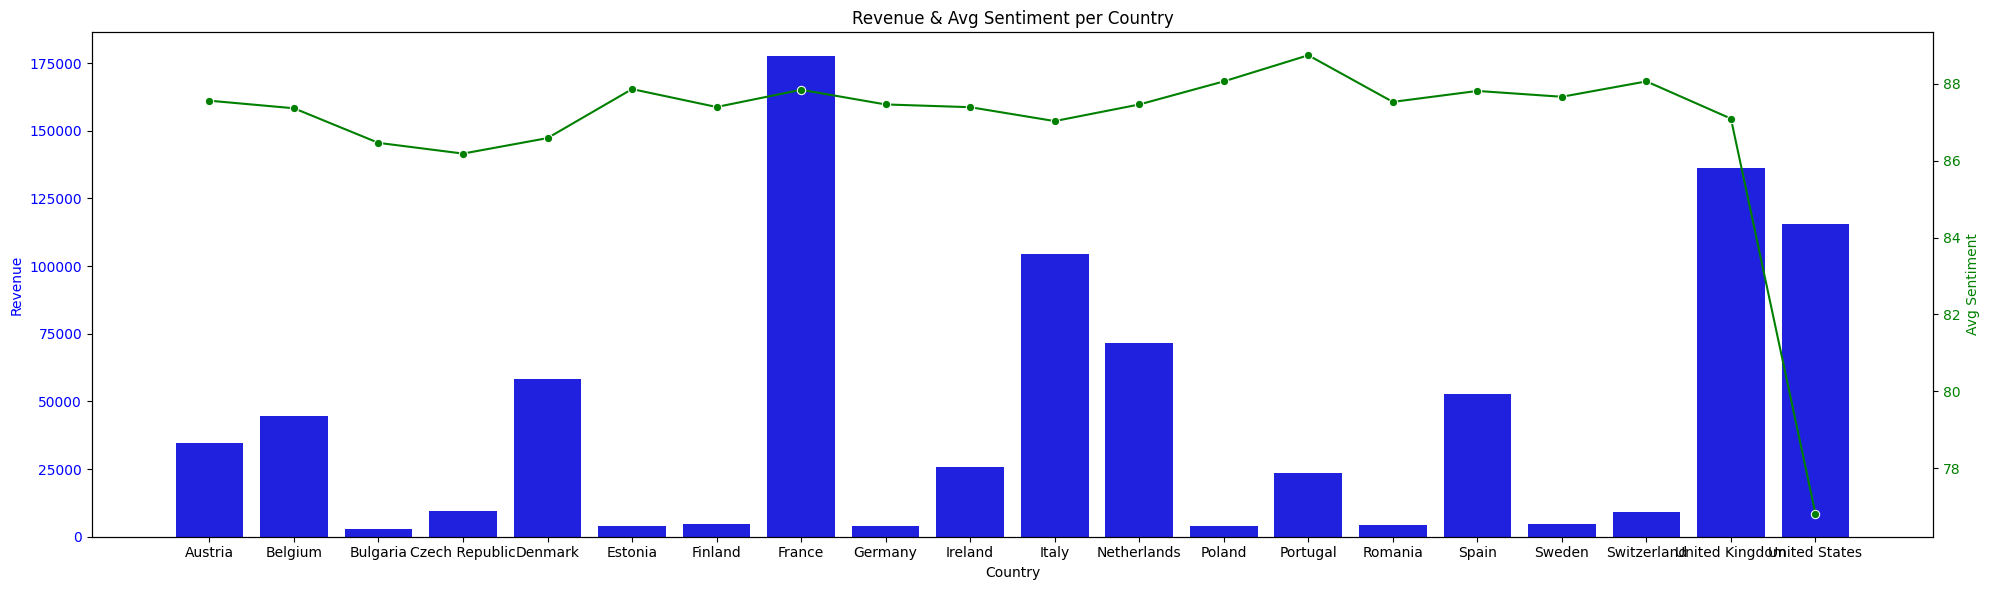

In [104]:
country_data['Avg_Sentiment'] = final_data.groupby('Country')['Sentiment'].mean().values

# Plot
fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(x='Country', y='Revenue', data=country_data, ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x='Country', y='Avg_Sentiment', data=country_data, ax=ax2, color='green', marker='o')
ax2.set_ylabel('Avg Sentiment', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Revenue & Avg Sentiment per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [110]:
print(final_data.columns)

Index(['OrderID', 'Date', 'Country', 'City', 'Latitude', 'Longtitude',
       'ProductCategoryName', 'ProductID', 'Quantity', 'Discount', 'Price',
       'Status', 'Year_Month', 'Location_ID', 'Sentiment', 'Class', 'Product',
       'Revenue', 'Refund'],
      dtype='object')


In [112]:
geo_data = final_data.groupby('Location_ID').agg({
    'Latitude': 'first',
    'Longtitude': 'first',
    'Revenue': 'sum',
    'Refund': 'sum',
    'Sentiment': 'mean'
}).reset_index()

import plotly.graph_objects as go

# Initialize figure
fig = go.Figure()

# Layer 1: Avg Sentiment
fig.add_trace(go.Scattergeo(
    lon = geo_data['Longtitude'],
    lat = geo_data['Latitude'],
    text = geo_data['Location_ID'],
    marker = dict(
        size = geo_data['Revenue'] / 1000,  # Adjust the size for visibility
        color = geo_data['Sentiment'],
        colorscale = 'Viridis',
        colorbar_title = 'Avg Sentiment',
        showscale = True
    ),
    name = 'Avg Sentiment'
))

# Layer 2: Revenue
fig.add_trace(go.Scattergeo(
    lon = geo_data['Longtitude'],
    lat = geo_data['Latitude'],
    text = geo_data['Location_ID'],
    marker = dict(
        size = geo_data['Revenue'] / 1000,  # Adjust the size for visibility
        color = geo_data['Revenue'],
        colorscale = 'Blues',
        colorbar_title = 'Revenue',
        showscale = False
    ),
    name = 'Revenue'
))

# Layer 3: Refunds
fig.add_trace(go.Scattergeo(
    lon = geo_data['Longtitude'],
    lat = geo_data['Latitude'],
    text = geo_data['Location_ID'],
    marker = dict(
        size = geo_data['Refund'] / 1000,  # Adjust the size for visibility
        color = geo_data['Refund'],
        colorscale = 'Reds',
        colorbar_title = 'Refunds',
        showscale = False
    ),
    name = 'Refunds'
))

fig.update_layout(
    title = 'GeoMap with Revenue, Refunds, and Avg Sentiment',
    geo_scope='world',
    geo=dict(
        projection_type='natural earth',
        showland=True,
    )
)

fig.show()

Conclusion:

US Problems
 * Using Sentiment + Refund:Revenue ratio to spot the problems
 * Potential Quality Issue In San Diego, CA
 * Possible counterfeit issues in Los Angeles & Las Vegas

 * Investigate a possible quality issue in San Diego by contacting affected customers and offering prizes for their feedback. Additionally, test the complete order cycle using secret shoppers.

* Investigate potential counterfeit products in Los Angeles and Las Vegas by examining negative reviews for origin data and conducting competitive research. Ensure that phantom customers cannot leave bad reviews without making actual, verifiable purchases.






